# Solarpotential Wallis und Luzern

## Hypothese
In den Nebelmonaten müsste das Solarpotential im Wallis viel grösser sein als in Luzern. 

In [57]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## Load Solar data
Source: Quelle einfügen

In [4]:
# Load the solar.csv file into a DataFrame
df = pd.read_csv('./solar.csv')

Filtere nach den Kantonen Luzern und Wallis

In [ ]:
df_lu_vs = df[df["Canton"].isin(["Luzern","Valais"])]

display(df_lu_vs.head(5))
shape = df_lu_vs.shape
print(shape)


,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month07_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology
497,1001,Doppleschwand,Luzern,CH,7.97,0.29,0.42,0.70,0.84,0.97,...,1.39,1.21,1.00,0.72,0.44,0.34,8.41,2.05,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...
498,1002,Entlebuch,Luzern,CH,43.46,1.60,2.35,3.86,4.59,5.26,...,7.35,6.34,5.25,3.83,2.32,1.85,43.03,12.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...
499,1004,Flühli,Luzern,CH,35.18,1.44,2.17,3.43,3.86,4.04,...,5.70,5.01,4.41,3.54,2.12,1.73,35.97,12.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...
500,1005,Hasle (LU),Luzern,CH,24.11,0.89,1.32,2.17,2.55,2.88,...,4.09,3.55,3.01,2.22,1.34,1.03,26.51,5.29,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...
501,1007,Romoos,Luzern,CH,11.84,0.43,0.64,1.06,1.25,1.42,...,2.04,1.76,1.49,1.11,0.67,0.51,12.48,3.18,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...


(202, 36)


h3 Solarpotential unterschied zwischen Kanton Luzern und Wallis

Gesamt Solarkapazität Kanton Luzern  3298.84 Gwh
Gesamt Solarkapazität Kanton Wallis  3858.1000000000004 Gwh


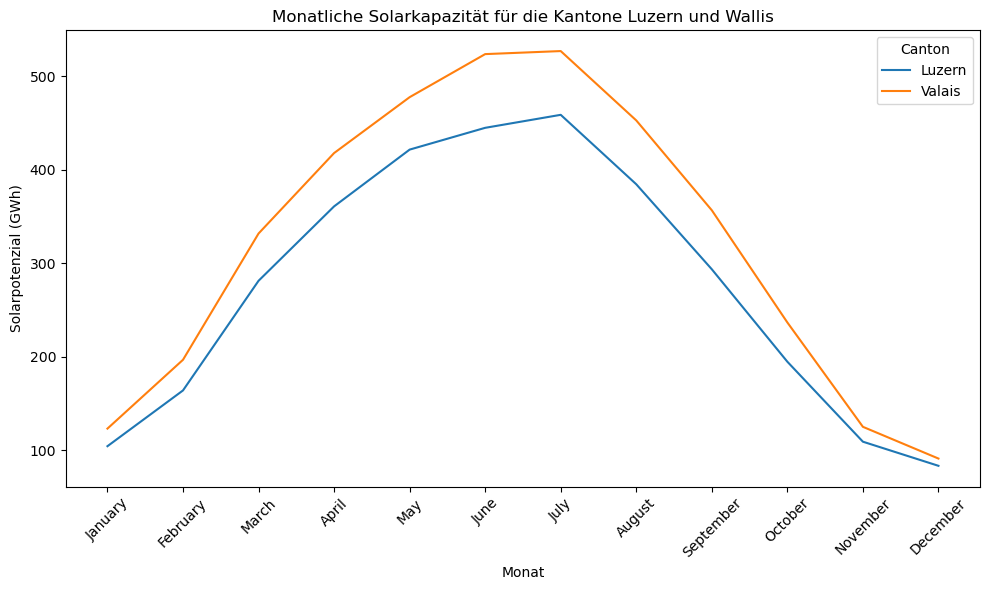

In [36]:

df_lu_vs = df[df["Canton"].isin(["Luzern","Valais"])]


solar_LU = df_lu_vs[df_lu_vs["Canton"] == "Luzern"]["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].sum()
solar_VS = df_lu_vs[df_lu_vs["Canton"] == "Valais"]["Scenario1_RoofsOnly_PotentialSolarElectricity_GWh"].sum()

print("Gesamt Solarkapazität Kanton Luzern ", solar_LU , "Gwh")
print("Gesamt Solarkapazität Kanton Wallis ", solar_VS , "Gwh")

# Define cantons and monthly columns
cantons = ["Luzern", "Valais"]
monthly_columns = [
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month06_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month07_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month08_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month09_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month10_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month11_GWh',
    'Scenario1_RoofsOnly_PotentialSolarElectricity_Month12_GWh'
]

# Initialize an empty list to store results for each canton
result_tables = []

# Loop through each canton, calculate the monthly sum, and store the result
for canton in cantons:
    canton_df = df_lu_vs[df_lu_vs["Canton"] == canton]
    monthly_sum = canton_df[monthly_columns].sum()
    monthly_sum_table = pd.DataFrame(monthly_sum, columns=["Total_GWh"])
    monthly_sum_table.reset_index(inplace=True)
    monthly_sum_table.rename(columns={"index": "Month"}, inplace=True)
    monthly_sum_table["Canton"] = canton
    result_tables.append(monthly_sum_table)

# Concatenate all results into a single table
final_table = pd.concat(result_tables, ignore_index=True)

# Custom month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
    'September', 'October', 'November', 'December'
]

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each canton and plot its data
for canton in cantons:
    canton_data = final_table[final_table["Canton"] == canton]
    plt.plot(canton_data["Month"], canton_data["Total_GWh"], label=canton)

# Set custom x-ticks and labels
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('Solarpotenzial (GWh)')
plt.title('Monatliche Solarkapazität für die Kantone Luzern und Wallis')
plt.legend(title='Canton')

# Display the plot
plt.tight_layout()
plt.show()

Liste gefilterte Gemeinden des Kantons Luzern mit dem Solarpotential 

In [29]:
# Filter
filter_GWh = 50

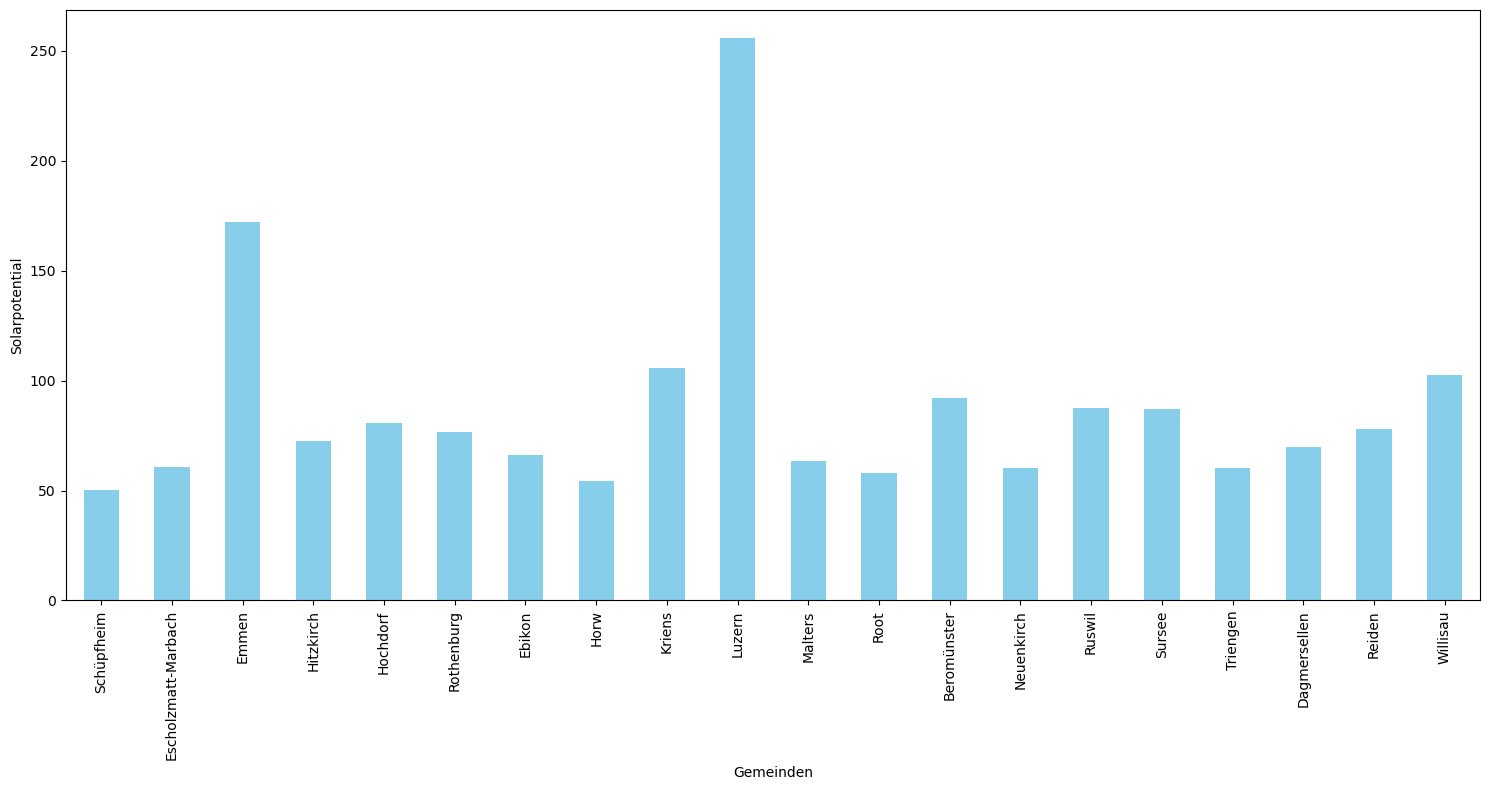

In [30]:

df_plot = df_lu_vs[(df_lu_vs["Canton"].isin(["Luzern"])) & (df_lu_vs['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] > filter_GWh)]

# Plot erstellen
plt.figure(figsize=(15, 8))
df_plot.plot(kind='bar', x='MunicipalityName', y='Scenario1_RoofsOnly_PotentialSolarElectricity_GWh', color='skyblue', legend=False, ax=plt.gca())
plt.xticks(rotation=90)  # X-Achsen-Beschriftungen rotieren für bessere Lesbarkeit
plt.xlabel('Gemeinden')
plt.ylabel('Solarpotential')

plt.tight_layout()
plt.show()

Liste gefilterte Gemeinden des Kantons Wallis mit dem Solarpotential 

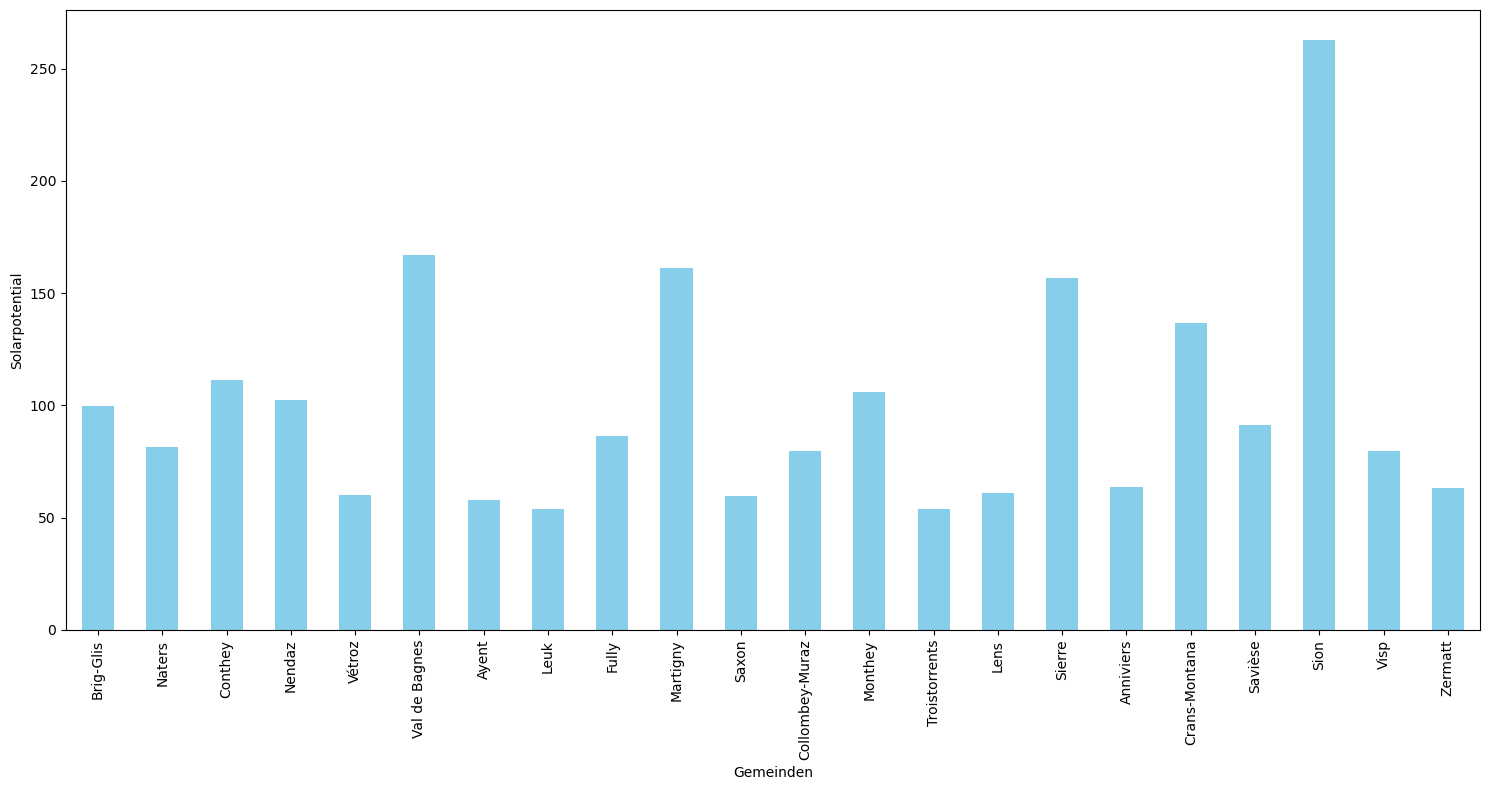

In [31]:
df_plot = df_lu_vs[(df_lu_vs["Canton"].isin(["Valais"])) & (df_lu_vs['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] > filter_GWh)]

# Plot erstellen
plt.figure(figsize=(15, 8))
df_plot.plot(kind='bar', x='MunicipalityName', y='Scenario1_RoofsOnly_PotentialSolarElectricity_GWh', color='skyblue', legend=False, ax=plt.gca())
plt.xticks(rotation=90)  # X-Achsen-Beschriftungen rotieren für bessere Lesbarkeit
plt.xlabel('Gemeinden')
plt.ylabel('Solarpotential')

plt.tight_layout()
plt.show()

## Lade Bevölkerungsdaten


In [49]:
df_people = pd.read_csv('./bevolkerung_gemeinde.csv', encoding = 'latin-1')

display(df_people)

,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,1 Person,2 Personen,3 Personen,4 Personen,5 Personen,6 oder mehr Personen
0,2023,Schweiz / Suisse / Svizzera / Switzerland,8778064,1495027,2608348,1533822,1969888,794030,376949
1,2023,- Zürich,1575217,269441,468998,279780,357872,133640,65486
2,2023,>> Bezirk Affoltern,57199,7311,17006,9897,15136,5580,2269
3,2023,......0001 Aeugst am Albis,1985,272,646,321,500,185,61
4,2023,......0002 Affoltern am Albis,12585,2019,3846,2136,2840,1150,594
...,...,...,...,...,...,...,...,...,...
2301,2023,......6807 Basse-Allaine,1188,208,348,180,224,135,93
2302,2023,......6808 Clos du Doubs,1264,251,416,189,232,120,56
2303,2023,......6809 Haute-Ajoie,1042,193,380,171,180,75,43
2304,2023,......6810 La Baroche,1125,180,348,171,236,130,60


Filtere und bereinige Gemeinden und Anzahl Einwohner

In [50]:
print(df_people.columns)

df_people = df_people.drop(columns = ['1 Person','2 Personen', '3 Personen', '4 Personen', '5 Personen', '6 oder mehr Personen'])

display(df_people)

Index(['Jahr', 'Kanton (-) / Bezirk (>>) / Gemeinde (......)',
       'Haushaltsgrösse - Total', '1 Person', '2 Personen', '3 Personen',
       '4 Personen', '5 Personen', '6 oder mehr Personen'],
      dtype='object')


,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total
0,2023,Schweiz / Suisse / Svizzera / Switzerland,8778064
1,2023,- Zürich,1575217
2,2023,>> Bezirk Affoltern,57199
3,2023,......0001 Aeugst am Albis,1985
4,2023,......0002 Affoltern am Albis,12585
...,...,...,...
2301,2023,......6807 Basse-Allaine,1188
2302,2023,......6808 Clos du Doubs,1264
2303,2023,......6809 Haute-Ajoie,1042
2304,2023,......6810 La Baroche,1125


In [ ]:
df_people['Kanton'] = np.nan



# Funktion, um die Gemeinde aus der Adresse zu extrahieren
def extract_name(address):
    # Verwende ein reguläres Ausdruck, um nur den Namen zu extrahieren
    match = re.search(r'\d+\s+(.+)', address)
    if match:
        return match.group(1)
    else:
        return None
    
# Funktion, um den Kanton aus der Adresse zu extrahieren
def extract_kanton(address):
    # Verwende ein reguläres Ausdruck, um nur den Namen zu extrahieren
    match = re.search(r'- (.+)', address)
    if match:
        return match.group(1)
    else:
        return None
    

df_people['Gemeinde'] = df_people['Kanton (-) / Bezirk (>>) / Gemeinde (......)'].apply(extract_name)
df_people['Kanton'] = df_people['Kanton (-) / Bezirk (>>) / Gemeinde (......)'].apply(extract_kanton).ffill()

display(df_people)

,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde
0,2023,Schweiz / Suisse / Svizzera / Switzerland,8778064,None,None
1,2023,- Zürich,1575217,Zürich,None
2,2023,>> Bezirk Affoltern,57199,Zürich,None
3,2023,......0001 Aeugst am Albis,1985,Zürich,Aeugst am Albis
4,2023,......0002 Affoltern am Albis,12585,Zürich,Affoltern am Albis
...,...,...,...,...,...
2301,2023,......6807 Basse-Allaine,1188,Jura,Basse-Allaine
2302,2023,......6808 Clos du Doubs,1264,Jura,Clos du Doubs
2303,2023,......6809 Haute-Ajoie,1042,Jura,Haute-Ajoie
2304,2023,......6810 La Baroche,1125,Jura,La Baroche


Filtere nach den Kantonen Wallis und Luzern

In [101]:
# Filtere alle Nans ('None') aus den Gemeinden
df_people = df_people.dropna(subset = ['Gemeinde'])

# Reduziere auf Luzern und Wallis
df_people_vs_lu = df_people[(df_people['Kanton'].isin(["Luzern","Valais / Wallis"]))]

# Ersetze "Valais / Wallis" mit "Valais"
df_people_vs_lu['Kanton'] = df_people_vs_lu['Kanton'].replace("Valais / Wallis", "Valais")

display(df_people_vs_lu)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_34512\3506276548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_people_vs_lu['Kanton'] = df_people_vs_lu['Kanton'].replace("Valais / Wallis", "Valais")


,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde
524,2023,......1061 Luzern,83048,Luzern,Luzern
526,2023,......1051 Adligenswil,5540,Luzern,Adligenswil
527,2023,......1052 Buchrain,6724,Luzern,Buchrain
528,2023,......1053 Dierikon,1653,Luzern,Dierikon
529,2023,......1054 Ebikon,14430,Luzern,Ebikon
...,...,...,...,...,...
2170,2023,......6296 Törbel,480,Valais,Törbel
2171,2023,......6297 Visp,8308,Valais,Visp
2172,2023,......6298 Visperterminen,1293,Valais,Visperterminen
2173,2023,......6299 Zeneggen,315,Valais,Zeneggen


In [ ]:
# Führe einen Join über die Spalte 'Gemeinde' durch
df_merged = pd.merge(df_lu_vs, df_people_vs_lu, left_on='MunicipalityName', right_on='Gemeinde', how='left')

# Berenche das Potential pro Einwohner um attraktive Gemeinden zu finden
df_merged['Solarpotential pro Einwohner'] = df_merged['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] / df_merged["Haushaltsgrösse - Total"]

display(df_merged)

,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde
0,1001,Doppleschwand,Luzern,CH,7.97,0.29,0.42,0.70,0.84,0.97,...,0.34,8.41,2.05,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1001 Doppleschwand,822,Luzern,Doppleschwand
1,1002,Entlebuch,Luzern,CH,43.46,1.60,2.35,3.86,4.59,5.26,...,1.85,43.03,12.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1002 Entlebuch,3318,Luzern,Entlebuch
2,1004,Flühli,Luzern,CH,35.18,1.44,2.17,3.43,3.86,4.04,...,1.73,35.97,12.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1004 Flühli,1647,Luzern,Flühli
3,1005,Hasle (LU),Luzern,CH,24.11,0.89,1.32,2.17,2.55,2.88,...,1.03,26.51,5.29,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1005 Hasle (LU),1764,Luzern,Hasle (LU)
4,1007,Romoos,Luzern,CH,11.84,0.43,0.64,1.06,1.25,1.42,...,0.51,12.48,3.18,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1007 Romoos,641,Luzern,Romoos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6296,Törbel,Valais,CH,11.62,0.48,0.65,1.00,1.19,1.39,...,0.66,13.72,2.43,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6296 Törbel,480,Valais,Törbel
198,6297,Visp,Valais,CH,79.92,1.92,3.12,6.50,8.98,10.72,...,2.03,85.74,13.33,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6297 Visp,8308,Valais,Visp
199,6298,Visperterminen,Valais,CH,18.39,0.61,0.93,1.57,1.96,2.28,...,0.69,19.72,4.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6298 Visperterminen,1293,Valais,Visperterminen
200,6299,Zeneggen,Valais,CH,6.88,0.24,0.35,0.58,0.72,0.85,...,0.32,8.07,1.56,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6299 Zeneggen,315,Valais,Zeneggen


,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh,...,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde,Solarpotential pro Einwohner
0,1001,Doppleschwand,Luzern,CH,7.97,0.29,0.42,0.70,0.84,0.97,...,8.41,2.05,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1001 Doppleschwand,822,Luzern,Doppleschwand,0.009696
1,1002,Entlebuch,Luzern,CH,43.46,1.60,2.35,3.86,4.59,5.26,...,43.03,12.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1002 Entlebuch,3318,Luzern,Entlebuch,0.013098
2,1004,Flühli,Luzern,CH,35.18,1.44,2.17,3.43,3.86,4.04,...,35.97,12.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1004 Flühli,1647,Luzern,Flühli,0.021360
3,1005,Hasle (LU),Luzern,CH,24.11,0.89,1.32,2.17,2.55,2.88,...,26.51,5.29,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1005 Hasle (LU),1764,Luzern,Hasle (LU),0.013668
4,1007,Romoos,Luzern,CH,11.84,0.43,0.64,1.06,1.25,1.42,...,12.48,3.18,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1007 Romoos,641,Luzern,Romoos,0.018471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6296,Törbel,Valais,CH,11.62,0.48,0.65,1.00,1.19,1.39,...,13.72,2.43,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6296 Törbel,480,Valais,Törbel,0.024208
198,6297,Visp,Valais,CH,79.92,1.92,3.12,6.50,8.98,10.72,...,85.74,13.33,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6297 Visp,8308,Valais,Visp,0.009620
199,6298,Visperterminen,Valais,CH,18.39,0.61,0.93,1.57,1.96,2.28,...,19.72,4.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6298 Visperterminen,1293,Valais,Visperterminen,0.014223
200,6299,Zeneggen,Valais,CH,6.88,0.24,0.35,0.58,0.72,0.85,...,8.07,1.56,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6299 Zeneggen,315,Valais,Zeneggen,0.021841


In [109]:
# Finde die 10 attraktivsten Gemeinden pro Kanton
top10_vs = df_merged[df_merged['Kanton'] == 'Valais'].nlargest(10, 'Solarpotential pro Einwohner')
top10_lu = df_merged[df_merged['Kanton'] == 'Luzern'].nlargest(10, 'Solarpotential pro Einwohner')

display(top10_vs)
display(top10_lu)

,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh,...,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde,Solarpotential pro Einwohner
117,6112,Oberems,Valais,CH,6.40,0.19,0.31,0.60,0.77,0.84,...,6.94,0.78,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6112 Oberems,135,Valais,Oberems,0.047407
145,6181,Riederalp,Valais,CH,19.09,0.76,1.04,1.67,2.00,2.27,...,21.91,6.08,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6181 Riederalp,431,Valais,Riederalp,0.044292
97,6052,Bellwald,Valais,CH,15.37,0.62,0.86,1.36,1.61,1.83,...,17.17,5.23,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6052 Bellwald,348,Valais,Bellwald,0.044167
98,6054,Binn,Valais,CH,5.02,0.13,0.25,0.47,0.59,0.66,...,4.96,0.87,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6054 Binn,115,Valais,Binn,0.043652
158,6205,Bettmeralp,Valais,CH,19.40,0.78,1.10,1.74,2.08,2.33,...,23.81,6.30,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6205 Bettmeralp,468,Valais,Bettmeralp,0.041453
92,6032,Bourg-Saint-Pierre,Valais,CH,7.85,0.24,0.43,0.76,0.92,1.01,...,7.70,1.22,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6032 Bourg-Saint-Pierre,199,Valais,Bourg-Saint-Pierre,0.039447
103,6076,Obergoms,Valais,CH,23.55,0.77,1.32,2.28,2.76,2.94,...,26.41,5.84,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6076 Obergoms,625,Valais,Obergoms,0.037680
112,6102,Albinen,Valais,CH,8.75,0.34,0.47,0.75,0.93,1.05,...,9.34,1.76,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6102 Albinen,260,Valais,Albinen,0.033654
104,6077,Goms,Valais,CH,37.74,1.38,2.16,3.52,4.11,4.53,...,42.62,9.12,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6077 Goms,1133,Valais,Goms,0.033310
84,6009,Simplon,Valais,CH,8.98,0.32,0.52,0.88,1.04,1.16,...,10.08,1.83,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......6009 Simplon,277,Valais,Simplon,0.032419


,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh,Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh,...,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,Jahr,Kanton (-) / Bezirk (>>) / Gemeinde (......),Haushaltsgrösse - Total,Kanton,Gemeinde,Solarpotential pro Einwohner
2,1004,Flühli,Luzern,CH,35.18,1.44,2.17,3.43,3.86,4.04,...,35.97,12.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1004 Flühli,1647,Luzern,Flühli,0.021360
20,1041,Schongau,Luzern,CH,20.92,0.69,1.07,1.80,2.26,2.65,...,23.25,3.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1041 Schongau,1052,Luzern,Schongau,0.019886
68,1135,Luthern,Luzern,CH,23.73,0.84,1.26,2.09,2.50,2.89,...,23.67,5.04,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1135 Luthern,1218,Luzern,Luthern,0.019483
75,1145,Ufhusen,Luzern,CH,17.61,0.62,0.92,1.53,1.86,2.17,...,17.89,3.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1145 Ufhusen,920,Luzern,Ufhusen,0.019141
61,1123,Altishofen,Luzern,CH,36.71,1.07,1.77,3.07,4.01,4.73,...,38.49,5.66,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1123 Altishofen,1970,Luzern,Altishofen,0.018635
4,1007,Romoos,Luzern,CH,11.84,0.43,0.64,1.06,1.25,1.42,...,12.48,3.18,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1007 Romoos,641,Luzern,Romoos,0.018471
77,1147,Wikon,Luzern,CH,26.83,0.75,1.28,2.24,2.93,3.48,...,27.49,4.14,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1147 Wikon,1480,Luzern,Wikon,0.018128
66,1131,Grossdietwil,Luzern,CH,15.52,0.51,0.79,1.33,1.66,1.95,...,16.59,2.78,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1131 Grossdietwil,882,Luzern,Grossdietwil,0.017596
15,1032,Hohenrain,Luzern,CH,42.15,1.46,2.18,3.65,4.60,5.32,...,47.00,6.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1032 Hohenrain,2422,Luzern,Hohenrain,0.017403
65,1129,Fischbach,Luzern,CH,11.73,0.39,0.59,1.00,1.26,1.47,...,12.26,2.15,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2023,......1129 Fischbach,689,Luzern,Fischbach,0.017025
